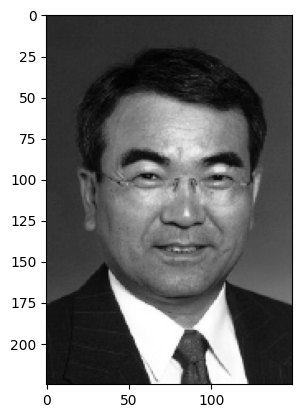

In [1]:
from dense_image_aligment.transformations.affine import AffineTransformation
import numpy as np
from dense_image_aligment import read_as_grayscale
import matplotlib.pyplot as plt 


image = read_as_grayscale('./media/kanade.jpg')
plt.imshow(image, cmap='Greys_r')
plt.show()

In [2]:
at = AffineTransformation()

In [3]:
at.p[0] = 1.5
at.p[2] = -10.
at.p

array([  1.5,   0. , -10. ,   0. ,   1. ,   0. ], dtype=float32)

In [4]:
image_transformed = at.apply_transformation(image=image, shape=image.shape)

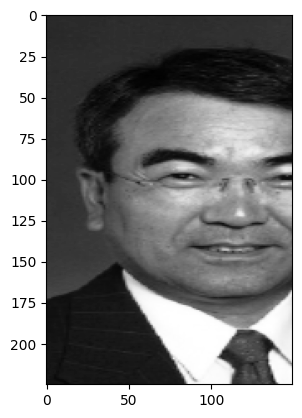

In [5]:
plt.imshow(image_transformed, cmap='Greys_r')
plt.show()

In [1]:
from dense_image_aligment import show_data, image_aligment_method, read_as_grayscale
from dense_image_aligment import save_aligment_progress, read_as_colored, show_data
import numpy as np
from dense_image_aligment.transformations.affine import AffineTransformation

In [2]:
image = read_as_grayscale('./media/kanade_image.jpg')
templ = read_as_grayscale('./media/kanade.jpg')

image.shape, templ.shape

((70, 50), (225, 150))

In [3]:
method, params = image_aligment_method(key='forward_additive')
params['alpha'] = 1.0
params['max_iterations'] = 100
params['p_init'] = np.array([[  1.02040816,  -0.10204082, -33.67346939],
       [ -0.20408163,   1.02040816, -63.26530612]]).reshape(-1)

affine_transform = AffineTransformation(params['p_init'].reshape(-1))

In [4]:
# import cv2 
# cv2.invertAffineTransform(np.array(
#     [
#         [1, 0.1, 40], 
#         [0.2, 1., 70.],
#     ]
# ))

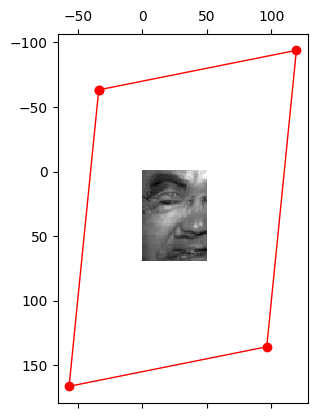

In [5]:
show_data(
    image=templ, 
    template=image, 
    coords_transform=affine_transform
)

In [6]:
params

{'max_iterations': 100,
 'convergence_threshold': 0.0001,
 'verbose': True,
 'alpha': 1.0,
 'p_init': array([  1.02040816,  -0.10204082, -33.67346939,  -0.20408163,
          1.02040816, -63.26530612])}

In [7]:
ps = method(
    image=templ,
    template=image,
    coord_transform=affine_transform,
    **params
)

iteration: 99, |∇p|=0.01322: 100%|██████████| 100/100 [00:53<00:00,  1.86it/s]


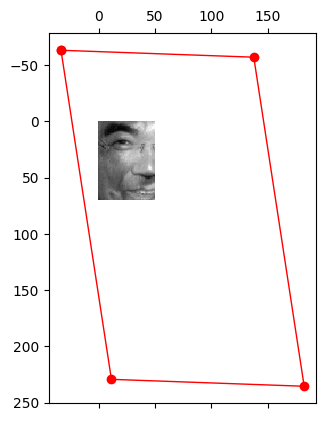

In [8]:
affine_transform.p = ps[-1]

show_data(
    image=templ, 
    template=image, 
    coords_transform=affine_transform
)

 52%|█████▏    | 53/101 [00:39<00:36,  1.33it/s]


KeyboardInterrupt: 

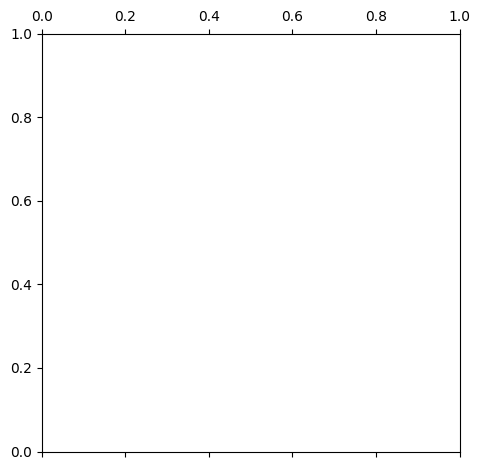

In [21]:
save_aligment_progress(
    f'./draft.gif',
    image=templ,
    template=image,
    coords_transform=affine_transform,
    ps=ps,
    duration=100,
)